# CYRENE Hackathon: Microsoft Malware Classification



## 1. Hackathon Challange

### 1.1 Challange Summary
The malware industry is an everchanging and developing market that causes financial and emotional harm to computer system users. Anti-malware companies face the challenge of evaluating vast amounts of data and files to find potential malicious intent, with malware authors using techniques to evade detection such as polymorphism. To effectively analyse and classify such large amounts of data, clustering and family identification are necessary. The CYRENE Consortium have proposed a dataset provided via Microsoft(Kaggle) to address this challange.

### 1.2 What is Malware?

Malware is software created with the intent to cause malicious harm to an individual or companies computer or network(Reshmi, T.R., 2021, p.100013).


Reshmi, T.R., 2021. Information security breaches due to ransomware attacks-a systematic literature review. International Journal of Information Management Data Insights, 1(2), p.100013.

### 1.3 Dataset

The link to the dataset: xxxxxxxxxxxx

The dataset is around 500GB of data and contains a huge collection of malware incidents. These malware incidents can be split into a mix of 9 families. Each given malware has an ID. This is a 20 charachter hash value uniquely identifying the file and its corresponding family. The 9 families have been given in the challange breif, these are the following:

1. Ramnit
2. Lollipop
3. Kelihos_ver3
4. Vundo
5. Simda
6. Tracur
7. Kelihos_ver1
8. Ovfuscator.ACY
9. Gatak

Each given file contains the following. raw data containing haxadecimal representation of given files binary content, without a PE (Port Executble) header. The given dataset also contains a manifest of which is a log with an array of metadata information extracted.

The dataset given contains the following files:

* dataSample.cvc - A sample of the dataset to preview before downloading

* train.7z - The raw data for the training set (MD5 hash = 4fedb0899fc2210a6c843889a70952ed)

* trainLables.cvs - The class labels associated with the training settest.7z - the raw data for the test set (MD5 hash = 84b6fbfb9df3c461ed2cbbfa371ffb43)

* test.7z - The raw data for the training set (MD5 hash = 4fedb0899fc2210a6c843889a70952ed)




## 2. Exploratory Data Analysis
if using anaconda may have to install the following:
* xgboost - conda install -c anaconda py-xgboost

In [16]:
import warnings #libary to suppress warning messages generated by other code
warnings.filterwarnings("ignore") # sets filter to ignore all warning messages that may be generated
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle 
from sklearn.manifold import TSNE 
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.calibration import CalibratedClassifierCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import log_loss 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

### 2.0.1 File Seperation

In [17]:
source = "train"
destination = "byteFiles"
#sets source and destination files as "train" and "byteFiles"

if os.path.isdir(source): # Checks if destination folder exists and creates if it does not
    os.rename(source,"asmFiles") # renames "train" folder to "asmFiles"
    source = "asmFiles" # updates the source folder variable
    data_files = os.listdir(source) # lists all the files in the "asmFiles" directory
    for file in data_files:
        if (file.endswith("bytes")):
            shutil.move(source+file,destination)
    #loops through files and checks if extension ends with ".bytes" if so then it is moved from "asmFiles" to "bytesFiles"
    #this is done via shutil libary


The purpose of this code is to seperate all the ".byte" and ".asm" files within the train directory. Then move only the ".byte" files to their own "bytesFiles" directory. This is useful when working with malware analysis where the ".byte" files represent binary code of the program and the ".asm" as the assembly code. Through seperation it makes analysis easier.

### 3.1 Distribution of malware classes in dataset

<IPython.core.display.Javascript object>


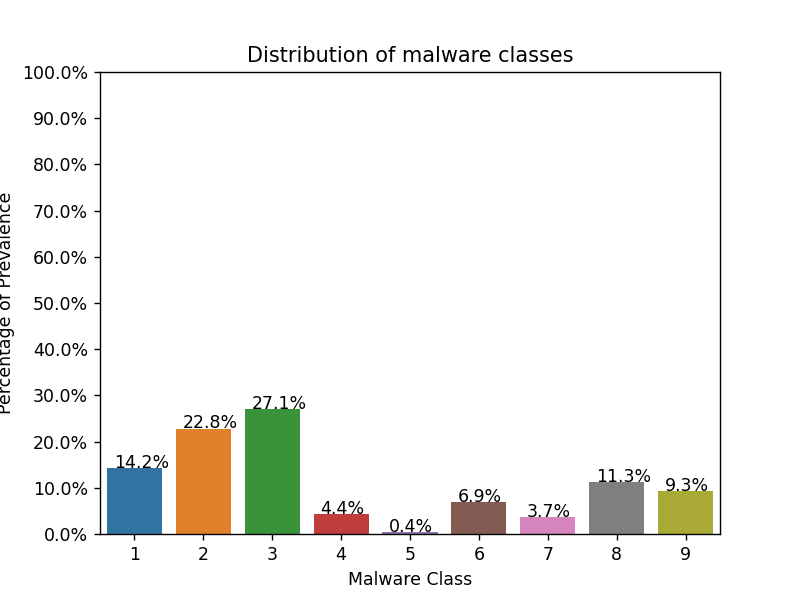

In [18]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1. #calculates and turns value to float
ax=sns.countplot(x="Class", data=Y)
ax.set(title='Distribution of malware classes', ylabel='Percentage of Prevalence')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    
#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

ax.set(xlabel='Malware Class')
plt.show()

